In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import seaborn as sb
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('../Assignments/sgemm_product_dataset/sgemm_product.csv')

In [3]:
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
dataset.shape

(241600, 18)

In [5]:
dataset.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [6]:
#datasetexp3 = sgemm2["MWG", "KWG","MDIMC", "MDIMA", "KWI", "VMN", "STRN", "SA", "avg_runtime"]

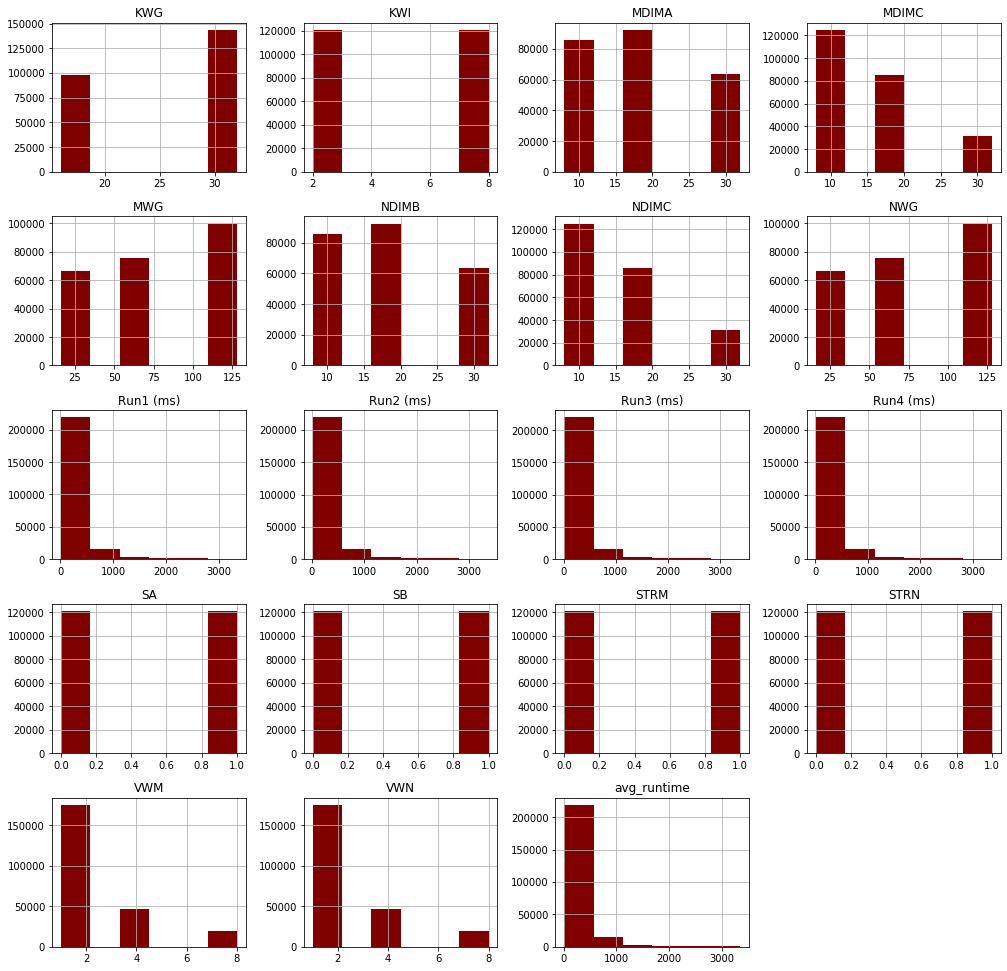

In [7]:
dataset['avg_runtime'] = dataset.iloc[:,14:18].mean(axis=1)
#taking mean of 4 variables
sgemm = pd.DataFrame(dataset)
sgemm
sgemm['avg_runtime'] = sgemm.iloc[:,14:18].mean(axis=1)
sgemm.hist(bins = 6 , figsize=(17,17), color = 'maroon');

Text(0.5, 0, 'Average Runtime')

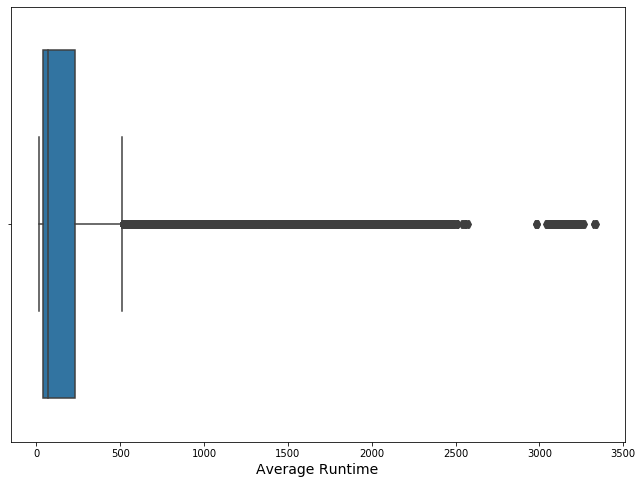

In [8]:
#boxplot
plt.figure(figsize=(11,8))
sb.boxplot(x="avg_runtime", data=sgemm)
plt.xlabel('Average Runtime', fontsize=14)

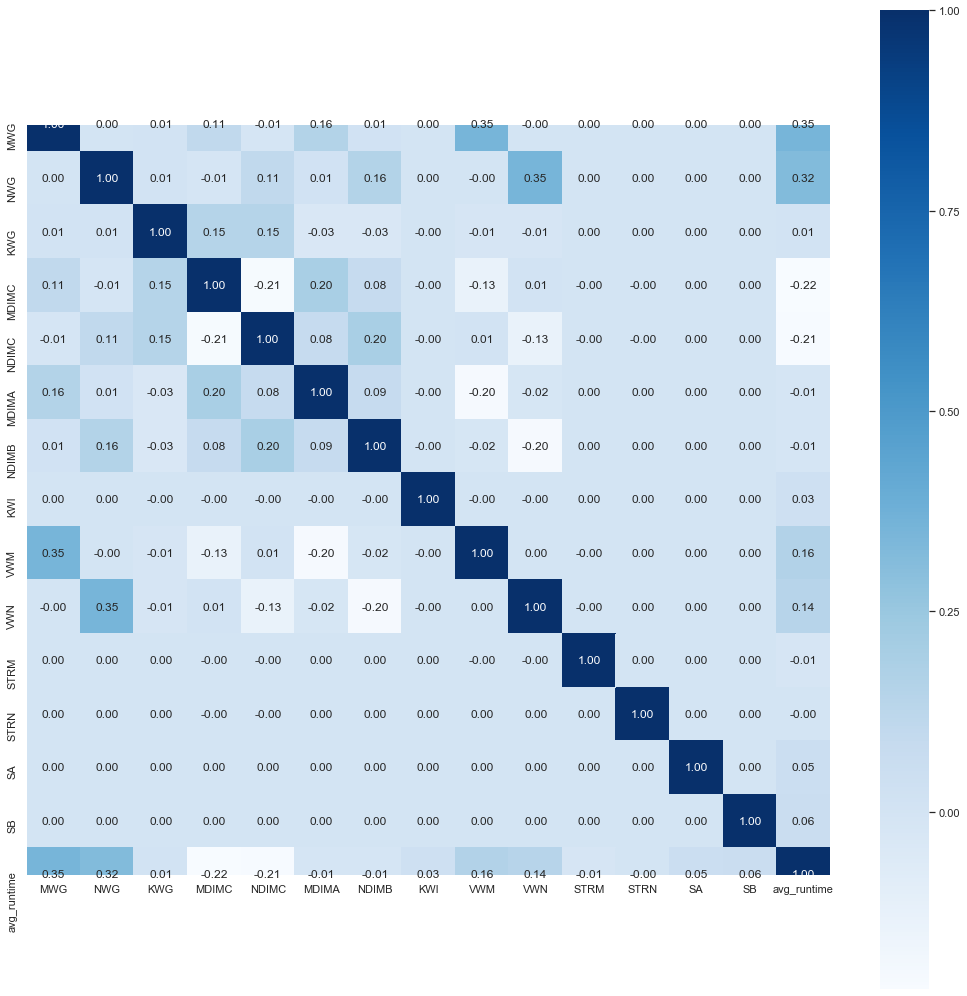

In [9]:
#Plotting correlation matrix
sgemmvar = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'avg_runtime']
sgemmcorr= sgemm[sgemmvar]
corr=sgemmcorr.corr()
plt.figure(figsize = (18,18))
sb.set(font_scale=1)
sb.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=sgemmvar, yticklabels=sgemmvar, cmap="Blues",)
plt.show();

In [10]:
#Taking 2sigmas
sgemm1 = sgemm.drop(sgemm[(sgemm.avg_runtime>sgemm.avg_runtime.quantile(0.975))].index)
sgemm2 = sgemm1.drop(sgemm1[(sgemm1.avg_runtime<sgemm.avg_runtime.quantile(0.025))].index) 
sgemm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229520 entries, 0 to 241598
Data columns (total 19 columns):
MWG            229520 non-null int64
NWG            229520 non-null int64
KWG            229520 non-null int64
MDIMC          229520 non-null int64
NDIMC          229520 non-null int64
MDIMA          229520 non-null int64
NDIMB          229520 non-null int64
KWI            229520 non-null int64
VWM            229520 non-null int64
VWN            229520 non-null int64
STRM           229520 non-null int64
STRN           229520 non-null int64
SA             229520 non-null int64
SB             229520 non-null int64
Run1 (ms)      229520 non-null float64
Run2 (ms)      229520 non-null float64
Run3 (ms)      229520 non-null float64
Run4 (ms)      229520 non-null float64
avg_runtime    229520 non-null float64
dtypes: float64(5), int64(14)
memory usage: 35.0 MB


In [11]:
sgemm2.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),avg_runtime
count,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000
mean,79.503799,79.212130,25.532659,14.048100,13.960404,17.282921,17.278913,4.984864,2.429078,2.417005,0.495674,0.498671,0.481322,0.486171,176.062995,176.046375,176.002530,175.993503,176.026351
std,42.590214,42.551021,7.851829,7.884239,7.836359,9.366788,9.365922,2.999968,1.951373,1.942145,0.499982,0.499999,0.499652,0.499810,223.598338,223.383485,223.381709,223.381412,223.430831
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.310000,22.110000,22.620000,22.340000,23.430000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,41.400000,41.470000,41.410000,41.380000,41.410000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.825000,69.930000,69.790000,69.820000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,217.010000,216.250000,216.270000,216.330000,216.623125
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1176.460000,1174.300000,1173.700000,1173.470000,1170.632500


In [12]:
data_np = sgemm2.values

In [13]:
type(data_np)

numpy.ndarray

In [14]:
x = data_np[:,:-5]

In [15]:
x

array([[ 16.,  16.,  16., ...,   0.,   0.,   0.],
       [ 16.,  16.,  16., ...,   0.,   0.,   1.],
       [ 16.,  16.,  16., ...,   0.,   1.,   0.],
       ...,
       [128., 128.,  32., ...,   1.,   0.,   0.],
       [128., 128.,  32., ...,   1.,   0.,   1.],
       [128., 128.,  32., ...,   1.,   1.,   0.]])

In [16]:
y = np.mean(data_np[:,-1:], axis=1)

In [17]:
stat.describe(y)

DescribeResult(nobs=229520, minmax=(23.43, 1170.6325000000002), mean=176.02635069928547, variance=49921.33640154747, skewness=2.224028260354725, kurtosis=4.7295163406567715)

In [18]:
y = np.expand_dims(y,axis=1)

# LINEAR REGRESSION

In [19]:
scaler = StandardScaler()

In [20]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [21]:
y1_train.shape

(160664, 1)

In [22]:
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

In [23]:
#x_scaled = scaler.fit_transform(x)

#Implementing Linear Regression using Gradient Descent Algorithm

In [24]:
class LinearRegressor(object):
    def __init__(self, num_features):
        self.num_features = num_features
        self.w = np.zeros((num_features,1), dtype=np.float64)
        self.b= np.zeros(1, dtype=np.float64)


    def forward(self, x):
        return np.dot(x, self.w) + self.b

#     @staticmethod
#     def loss(y_pred, y_true):
#         l = (np.sum(np.power(y_pred - y_true, 2))) / (2*len(y_true))
#         return l
    
    @staticmethod
    def loss(y_pred, y_true):
        l = y_pred - y_true
        l = np.dot(l.T, l)
        l = l/(2*len(y_true))
        return np.squeeze(l)
        
    def calculate_gradients(self, x, y_pred, y_true):
        self.dl_dw = np.dot(x.T, y_pred - y_true) / len(x)
        self.dl_db = np.mean(y_pred - y_true)

    def optimize(self, step_size):
        self.w -= step_size*self.dl_dw
        self.b -= step_size*self.dl_db

    def train(self, x, y, step_size=1.0):
        y_pred = self.forward(x)
        l = self.loss(y_pred=y_pred, y_true=y)
        self.calculate_gradients(x=x, y_pred=y_pred, y_true=y)
        self.optimize(step_size=step_size)
        return l

    def evaluate(self, x, y):
        losscal = self.loss(self.forward(x), y)
        rmse = (losscal*2)**(1/2)
        return rmse


In [25]:
### To calculate MSE and R-Squared

def mse(ytrue, ypred):
    rmse = (sum((ytrue - ypred) **2) / len(ytrue));
    return rmse;


def rsquared(ytrue, ypred):
    targetmean = np.mean(ytrue);
    totalsse = np.sum((ytrue - targetmean)**2);
    residualsse = np.sum((ytrue - ypred)**2);
    rsquared = 1 - (residualsse / totalsse);
    return rsquared;

#Implementing Linear Regression using Gradient Descent Algorithm for Different Learning Rate at a Threshold Value of 0

#Learning Rate alpha = 0.1

Threshold: 0 

Loss Function Converges at 327 

Model Loss:  12783.82512189654 

Model Weights: 
[[-1.98610089e-06]
 [-1.66322935e-06]
 [-1.28668869e-06]
 [ 2.18159819e-06]
 [ 2.09447475e-06]
 [ 2.02390600e-07]
 [ 1.03939650e-08]
 [-3.66493935e-08]
 [ 1.90472249e-06]
 [ 1.59976405e-06]
 [ 2.62879999e-08]
 [-1.42550481e-09]
 [-8.31686071e-08]
 [-7.21644859e-08]]
Model Bias: 
-2.0664364508240162e-13
alpha: 0.1


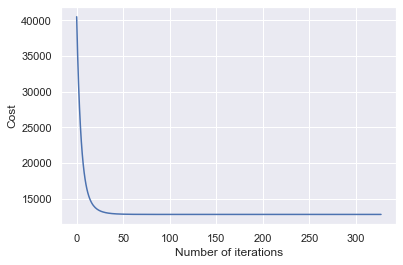

CPU times: user 3.61 s, sys: 89 ms, total: 3.7 s
Wall time: 974 ms


In [26]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(50000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.1)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',0.1);
plot01 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [27]:
msetest1 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial1 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: RMSE for Alpha 0.1:', msetest1,'\n')
print('Train Data: RMSE for Alpha 0.1:', msetrial1,'\n')
print('R-Squared:', rsquared(y1_test,regressor.forward(x1_test)), '\n')

Test Data: RMSE for Alpha 0.1: 159.46933920863577 

Train Data: RMSE for Alpha 0.1: 159.89887505480792 

R-Squared: 0.4881561207825281 



#Learning Rate alpha = 0.01

Threshold: 0 

Loss Function Converges at 3017 

Model Loss:  12783.825121897129 

Model Weights: 
[[-9.90288951e-06]
 [-8.38927603e-06]
 [-6.54742981e-06]
 [ 1.10548705e-05]
 [ 1.06435216e-05]
 [ 9.02251309e-07]
 [ 1.83333306e-08]
 [-1.85625481e-07]
 [ 9.48330849e-06]
 [ 8.06670763e-06]
 [ 1.34271260e-07]
 [-6.68530045e-09]
 [-4.21501155e-07]
 [-3.65007638e-07]]
Model Bias: 
-1.2000513812766117e-11
alpha: 0.01


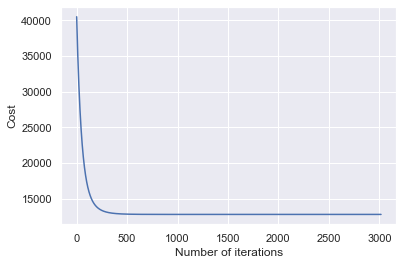

CPU times: user 24.1 s, sys: 197 ms, total: 24.3 s
Wall time: 6.25 s


In [28]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(50000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.01)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',0.01);
plot001 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [29]:
msetest2 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial2 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: RMSE for Alpha 0.01:', msetest2,'\n')
print('Trial Data: RMSE for Alpha 0.01:', msetrial2,'\n')

Test Data: RMSE for Alpha 0.01: 159.4693390170695 

Trial Data: RMSE for Alpha 0.01: 159.89887505481155 



#Learning Rate alpha = 0.001

Threshold: 0 

Loss Function Converges at 27847 

Model Loss:  12783.825121902955 

Model Weights: 
[[-3.18883609e-05]
 [-2.72060008e-05]
 [-2.13595326e-05]
 [ 3.59690427e-05]
 [ 3.46902676e-05]
 [ 2.68233202e-06]
 [-1.76642074e-08]
 [-6.03789174e-07]
 [ 3.05085703e-05]
 [ 2.61540680e-05]
 [ 4.38999839e-07]
 [-2.05399937e-08]
 [-1.37151984e-06]
 [-1.18619585e-06]]
Model Bias: 
-1.4035082512111079e-10
alpha: 0.001


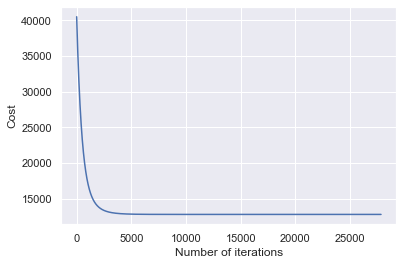

CPU times: user 3min 57s, sys: 1.44 s, total: 3min 58s
Wall time: 1min


In [30]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(50000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.001)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',0.001);
plot0001 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [31]:
msetest3 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial3 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: RMSE for Alpha 0.001:', msetest3,'\n')
print('Trial Data: RMSE for Alpha 0.001:', msetrial3,'\n')

Test Data: RMSE for Alpha 0.001: 159.46933848106957 

Trial Data: RMSE for Alpha 0.001: 159.89887505484802 



#Learning Rate alpha = 1

Threshold: 0 

Loss Function Converges at 31 

Model Loss:  12783.825121896512 

Model Weights: 
[[-2.34381375e-08]
 [-1.82795604e-08]
 [-1.37394365e-08]
 [ 2.37201177e-08]
 [ 2.23630322e-08]
 [ 3.54039960e-09]
 [ 2.49445010e-10]
 [-4.00321251e-10]
 [ 2.26971104e-08]
 [ 1.76481222e-08]
 [ 2.74873500e-10]
 [-1.87926330e-11]
 [-9.05469030e-10]
 [-7.94452691e-10]]
Model Bias: 
-7.0987050989845394e-15
alpha: 1


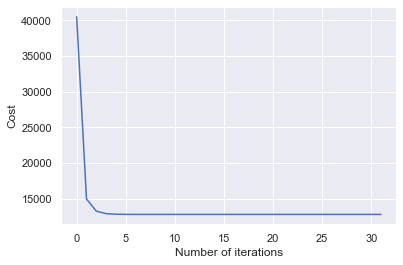

CPU times: user 1.07 s, sys: 17.9 ms, total: 1.09 s
Wall time: 312 ms


In [32]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',1);
plot1 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [33]:
msetest4 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial4 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: RMSE for Alpha 1:', msetest4,'\n')
print('Trial Data: RMSE for Alpha 1:', msetrial4,'\n')
print('R-Squared:', rsquared(y1_test,regressor.forward(x1_test)), '\n')

Test Data: RMSE for Alpha 1: 159.46933925280183 

Trial Data: RMSE for Alpha 1: 159.89887505480775 

R-Squared: 0.48815612049901114 



Threshold: 0 

Loss Function Converges at 36 

Model Loss:  12783.82512189651 

Model Weights: 
[[-5.44337487e-09]
 [-4.71777046e-09]
 [ 3.67444452e-08]
 [ 5.25935618e-08]
 [ 5.60231071e-08]
 [ 7.94265924e-08]
 [ 8.14851422e-08]
 [-9.67116714e-11]
 [-6.18689478e-08]
 [-6.37980666e-08]
 [-2.42651989e-09]
 [ 4.43210936e-11]
 [ 1.23232030e-09]
 [ 2.13076171e-09]]
Model Bias: 
-5.060799328941131e-15
alpha: 1


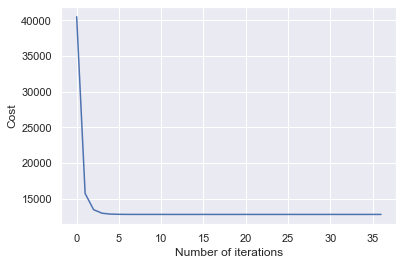

CPU times: user 1.07 s, sys: 12 ms, total: 1.08 s
Wall time: 295 ms


In [34]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1.11)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',1);
plot111 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

Threshold: 0 

Loss Function Converges at 1191 

Model Loss:  12783.825121896654 

Model Weights: 
[[ 3.16452031e-07]
 [ 8.38390924e-07]
 [-4.37873449e-06]
 [-5.91632942e-06]
 [-7.04808035e-06]
 [-9.30359555e-06]
 [-9.90659379e-06]
 [ 1.63653225e-08]
 [ 6.86347743e-06]
 [ 8.08483770e-06]
 [ 2.93247562e-07]
 [-7.02368152e-09]
 [-1.31017553e-07]
 [-2.63488016e-07]]
Model Bias: 
-3.605961043104586e-15
alpha: 1.4


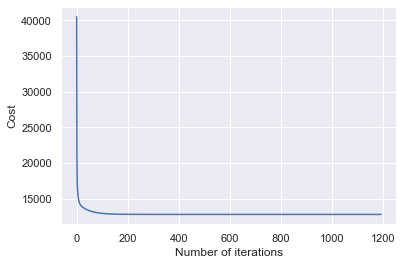

CPU times: user 9.75 s, sys: 44.9 ms, total: 9.79 s
Wall time: 2.54 s


In [35]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1.4)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',1.4);
plot14 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

Iteration: 0
40517.42908235032
Iteration: 1000
12785.722662494534
Iteration: 2000
12784.784189259683
Iteration: 3000
12784.468537850566
Iteration: 4000
12784.309842364371
Iteration: 5000
12784.214242717777
Iteration: 6000
12784.150307540613
Iteration: 7000
12784.10451973678
Iteration: 8000
12784.070101979056
Iteration: 9000
12784.043280298345
Iteration: 10000
12784.021785748359
Iteration: 11000
12784.004171889319
Iteration: 12000
12783.989472895899
Iteration: 13000
12783.97701915837
Iteration: 14000
12783.966331755808
Iteration: 15000
12783.957059054828
Iteration: 16000
12783.94893703488
Iteration: 17000
12783.9417635871
Iteration: 18000
12783.935381362026
Iteration: 19000
12783.929666022264
Iteration: 20000
12783.92451801164
Iteration: 21000
12783.919856670898
Iteration: 22000
12783.91561595469
Iteration: 23000
12783.911741263333
Iteration: 24000
12783.908187064908
Iteration: 25000
12783.904915086698
Iteration: 26000
12783.901892923124
Iteration: 27000
12783.899092952255
Iteration: 28

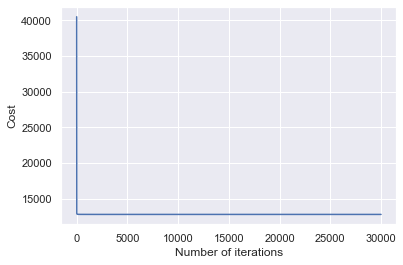

CPU times: user 4min 41s, sys: 2.07 s, total: 4min 43s
Wall time: 1min 11s


In [36]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(30000):   
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1/(1+iteration))
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0.000001;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha: 1/(1+iteration)');
plotiter = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [37]:
msetest5 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial5 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: RMSE for Alpha 0.0001:', msetest5,'\n')
print('Trial Data: RMSE for Alpha 0.0001:', msetrial5,'\n')

Test Data: RMSE for Alpha 0.0001: 159.46718471717443 

Trial Data: RMSE for Alpha 0.0001: 159.89929208744462 



#Implementing Linear Regression using Gradient Descent Algorithm for Different Threshold Value at alpha 1

#Changing threshold value to 0.0000000001

Threshold: 1e-10 

Loss Function Converges at 25 

Model Loss:  12783.825121896522 

Model Weights: 
[[-1.33168104e-06]
 [-1.07095244e-06]
 [-8.15312924e-07]
 [ 1.38302258e-06]
 [ 1.31351171e-06]
 [ 1.67203865e-07]
 [ 4.39838272e-09]
 [-2.34015841e-08]
 [ 1.29385911e-06]
 [ 1.04145614e-06]
 [ 1.66867895e-08]
 [-1.08372826e-09]
 [-5.32096778e-08]
 [-4.66247490e-08]]
Model Bias: 
-3.509726603963648e-15
alpha: 1


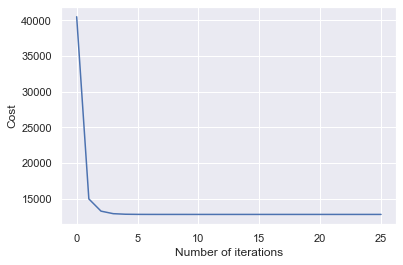

CPU times: user 1.07 s, sys: 16.4 ms, total: 1.09 s
Wall time: 302 ms


In [38]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    k=0.0000000001;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',1);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [39]:
msetest6 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial6 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: RMSE for Alpha 1 and Threshold 0.0000000001:', msetest6,'\n')
print('Trial Data: RMSE for Alpha 1 and Threshold 0.0000000001:', msetrial6,'\n')

Test Data: RMSE for Alpha 1 and Threshold 0.0000000001: 159.46933923806375 

Trial Data: RMSE for Alpha 1 and Threshold 0.0000000001: 159.89887505480777 



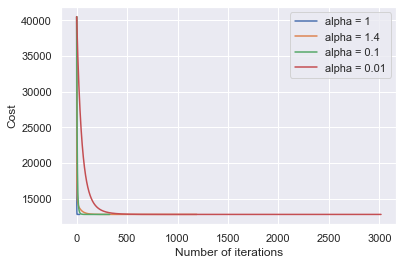

In [40]:
plt.plot(range(len(plot1)), plot1, label = 'alpha = 1')
plt.plot(range(len(plot14)), plot14, label = 'alpha = 1.4')
#plt.plot(range(len(plot111)), plot111, label = 'alpha = 1.11')
plt.plot(range(len(plot01)), plot01, label = 'alpha = 0.1')
plt.plot(range(len(plot001)), plot001, label = 'alpha = 0.01')
plt.legend()
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

# LOGISTIC REGRESSION

In [41]:
np.median(y,axis=0)

array([69.79])

In [42]:
np.percentile(y,75)

216.62312500000002

In [43]:
sgemm2.median()

MWG            64.000
NWG            64.000
KWG            32.000
MDIMC           8.000
NDIMC           8.000
MDIMA          16.000
NDIMB          16.000
KWI             2.000
VWM             2.000
VWN             2.000
STRM            0.000
STRN            0.000
SA              0.000
SB              0.000
Run1 (ms)      69.825
Run2 (ms)      69.930
Run3 (ms)      69.790
Run4 (ms)      69.820
avg_runtime    69.790
dtype: float64

In [44]:
ylogist = np.where(y > np.percentile(y,50), 1, 0)

In [45]:
stat.describe(ylogist)

DescribeResult(nobs=229520, minmax=(array([0]), array([1])), mean=array([0.49999564]), variance=array([0.25000109]), skewness=array([1.74276751e-05]), kurtosis=array([-2.]))

In [46]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, ylogist, test_size = 0.3, random_state = 0)

In [47]:
scaler = StandardScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

In [48]:
y1_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

#Implementing Logistic Regression using Gradient Descent Algorithm for Different Learning Rate at a Threshold Value of 0

In [49]:
class LogisticRegressor(object):
    def __init__(self, num_features):
        self.num_features = num_features
        self.w = np.zeros((num_features,1), dtype=np.float64)


    def forward(self, x):
        z = np.dot(x, self.w)
        return 1/(1+np.e**(-z))
        

#     @staticmethod
#     def loss(y_pred, y_true):
#         l = (np.sum(np.power(y_pred - y_true, 2))) / (2*len(y_true))
#         return l

    @staticmethod
    def loss(y_true,y_pred):
        l = -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
        return l

    def calculate_gradients(self,x,y_pred,y_true):
#        z = np.matmul(x,self.w) + self.b
        self.dl_dw = np.dot(x.T,y_pred - y_true) / len(x)


    def optimize(self, step_size):
        self.w -= step_size*self.dl_dw

    def train(self, x, y, step_size=1.0):
        y_pred = self.forward(x)
        l = self.loss(y_pred=y_pred, y_true=y)
        self.calculate_gradients(x=x, y_pred=y_pred, y_true=y)
        self.optimize(step_size=step_size)
        return l

#     def evaluate(self, x, y):
#         return self.loss(self.forward(x), y)

Iteration: 0
0.6931471805599454
Iteration: 1000
0.4903555616863843
Iteration: 2000
0.49035447400264454
Threshold: 0 

Loss Function Converges at 2747 

Model Loss:  0.4903544739630828 

Model Weights: 
[[-2.42418390e-08]
 [-1.74282379e-08]
 [-6.80758998e-09]
 [ 2.08646209e-08]
 [ 1.81835290e-08]
 [ 2.20874157e-09]
 [ 1.23595169e-09]
 [ 9.23773467e-11]
 [ 1.06923644e-08]
 [ 8.77064017e-09]
 [ 4.66325261e-09]
 [ 4.00834744e-10]
 [ 5.65356003e-09]
 [ 1.04827847e-09]]
alpha: 0.1


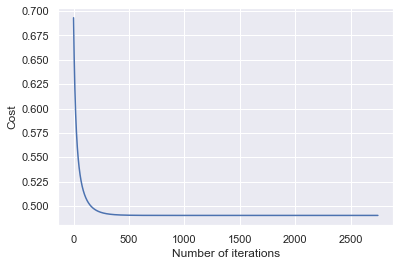

CPU times: user 1min 18s, sys: 1.08 s, total: 1min 19s
Wall time: 20.3 s


In [50]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(20000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.1)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',0.1);
plotlog01 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [51]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain1 = accuracy_score(ypredtrain,y1_train) 
print('Trial Data: Accuracy for Alpha 0.1:', acctrain1,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest1 = accuracy_score(ypredtest,y1_test) 
print('Test Data: Accuracy for Alpha 0.1:', acctest1,'\n')

Trial Data: Accuracy for Alpha 0.1: 0.7998058059054922 

Test Data: Accuracy for Alpha 0.1: 0.800075519925642 



In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y1_test, ypredtest))
print("Classification Report")
print(classification_report(y1_test, ypredtest))

Confusion Matrix:
[[27451  6925]
 [ 6841 27639]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     34376
           1       0.80      0.80      0.80     34480

    accuracy                           0.80     68856
   macro avg       0.80      0.80      0.80     68856
weighted avg       0.80      0.80      0.80     68856



Iteration: 0
0.6931471805599454
Iteration: 1000
0.5116595161321311
Iteration: 2000
0.4959440463667385
Iteration: 3000
0.49207776256745855
Iteration: 4000
0.49092438769259805
Iteration: 5000
0.49055007398507705
Iteration: 6000
0.49042301669683913
Iteration: 7000
0.4903787828362712
Iteration: 8000
0.49036315603877645
Iteration: 9000
0.4903575877664928
Iteration: 10000
0.49035559349372776
Iteration: 11000
0.4903548770739158
Iteration: 12000
0.49035461924059504
Iteration: 13000
0.4903545263476516
Iteration: 14000
0.4903544928580809
Iteration: 15000
0.49035448077976557
Iteration: 16000
0.49035447642258895
Iteration: 17000
0.4903544748505431
Iteration: 18000
0.49035447428330914
Iteration: 19000
0.4903544740786266
Iteration: 20000
0.4903544740047661
Iteration: 21000
0.49035447397811266
Iteration: 22000
0.4903544739684943
Iteration: 23000
0.49035447396502335
Iteration: 24000
0.4903544739637708
Threshold: 0 

Loss Function Converges at 24986 

Model Loss:  0.4903544739633226 

Model Weights: 
[

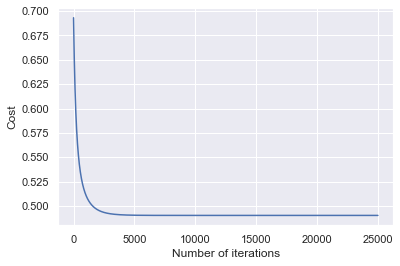

CPU times: user 12min 25s, sys: 12 s, total: 12min 37s
Wall time: 3min 11s


In [53]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(50000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.01)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',0.01);
plotlog001 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [54]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain2 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 0.01:', acctrain2,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest2 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 0.01:', acctest2,'\n')

Trial Data: Accuracy for Alpha 0.01: 0.7998058059054922 

Test Data: Accuracy for Alpha 0.01: 0.800075519925642 



Iteration: 0
0.6931471805599454
Iteration: 10000
0.5116775238081085
Iteration: 20000
0.49594994153351285
Iteration: 30000
0.4920799811421218
Iteration: 40000
0.4909252495883496
Iteration: 50000
0.4905504133854619
Threshold: 1e-08 

Loss Function Converges at 56825 

Model Loss:  0.4904501204874293 

Model Weights: 
[[-1.71869504e-03]
 [-1.24667497e-03]
 [-4.97275707e-04]
 [ 1.49156590e-03]
 [ 1.30472945e-03]
 [ 1.53237821e-04]
 [ 8.80162202e-05]
 [ 5.52991284e-06]
 [ 7.77986207e-04]
 [ 6.43843623e-04]
 [ 3.25102140e-04]
 [ 2.78855633e-05]
 [ 3.91464453e-04]
 [ 7.15748579e-05]]
alpha: 0.001


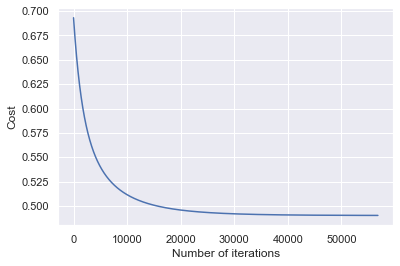

CPU times: user 25min 47s, sys: 11.3 s, total: 25min 59s
Wall time: 6min 31s


In [55]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(100000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.001)
    losses.append(loss)
    if iteration % 10000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0.00000001;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',0.001);
plotlog0001 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [56]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain3 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 0.001:', acctrain3,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest3 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 0.001:', acctest3,'\n')

Trial Data: Accuracy for Alpha 0.001: 0.7995008215903998 

Test Data: Accuracy for Alpha 0.001: 0.7998286278610434 



Iteration: 0
0.6931471805599454
Threshold: 0 

Loss Function Converges at 299 

Model Loss:  0.4903544739630643 

Model Weights: 
[[-4.73840540e-09]
 [-3.40657140e-09]
 [-1.33063617e-09]
 [ 4.07827725e-09]
 [ 3.55421453e-09]
 [ 4.31736482e-10]
 [ 2.41572252e-10]
 [ 1.80563986e-11]
 [ 2.08997866e-09]
 [ 1.71432470e-09]
 [ 9.11496092e-10]
 [ 7.83487895e-11]
 [ 1.10506525e-09]
 [ 2.04900266e-10]]
alpha: 1


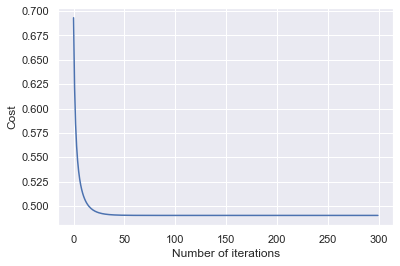

CPU times: user 9.92 s, sys: 182 ms, total: 10.1 s
Wall time: 2.55 s


In [57]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',1);
plotlog1 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [58]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain4 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 0.001:', acctrain4,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest4 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 0.001:', acctest4,'\n')

Trial Data: Accuracy for Alpha 0.001: 0.7998058059054922 

Test Data: Accuracy for Alpha 0.001: 0.800075519925642 



Iteration: 0
0.6931471805599454
Threshold: 0 

Loss Function Converges at 66 

Model Loss:  0.4903544739630635 

Model Weights: 
[[-8.73210627e-11]
 [-6.27773986e-11]
 [-2.45214290e-11]
 [ 7.51559637e-11]
 [ 6.54983037e-11]
 [ 7.95623356e-12]
 [ 4.45169548e-12]
 [ 3.32770553e-13]
 [ 3.85149360e-11]
 [ 3.15920768e-11]
 [ 1.67973786e-11]
 [ 1.44384660e-12]
 [ 2.03645313e-11]
 [ 3.77597741e-12]]
alpha: 5


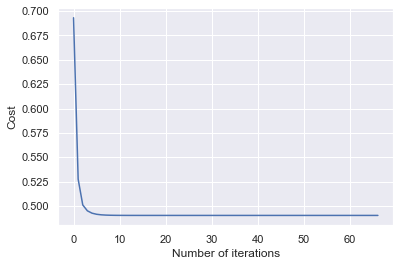

CPU times: user 2.72 s, sys: 46.2 ms, total: 2.77 s
Wall time: 710 ms


In [59]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=5)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',5);
plotlog5 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

Iteration: 0
0.6931471805599454
Threshold: 0 

Loss Function Converges at 43 

Model Loss:  0.4903544739630636 

Model Weights: 
[[-3.44232009e-10]
 [-5.64383671e-10]
 [-1.23219383e-10]
 [ 5.13549900e-10]
 [ 4.71381062e-10]
 [ 1.01524887e-10]
 [ 7.55942031e-11]
 [ 1.40232241e-12]
 [ 3.79107797e-10]
 [ 1.81985776e-11]
 [ 1.20237057e-10]
 [ 1.03019893e-11]
 [ 1.53017830e-10]
 [ 2.35608435e-11]]
alpha: 6.5


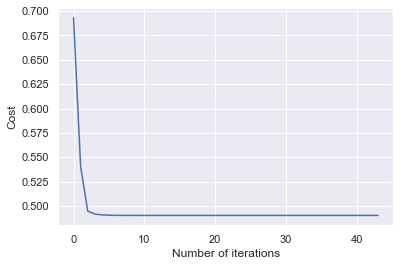

CPU times: user 1.99 s, sys: 24.4 ms, total: 2.01 s
Wall time: 510 ms


In [60]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=6.5)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',6.5);
plotlog65 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [61]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain5 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 6.5:', acctrain5,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest5 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 6.5:', acctest5,'\n')

Trial Data: Accuracy for Alpha 6.5: 0.7998058059054922 

Test Data: Accuracy for Alpha 6.5: 0.800075519925642 



In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y1_test, ypredtest))
print("Classification Report")
print(classification_report(y1_test, ypredtest))


# Confusion Matrix:
# [[27449  6927]
#  [ 6843 27637]]

Confusion Matrix:
[[27451  6925]
 [ 6841 27639]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     34376
           1       0.80      0.80      0.80     34480

    accuracy                           0.80     68856
   macro avg       0.80      0.80      0.80     68856
weighted avg       0.80      0.80      0.80     68856



#Implementing Linear Regression using Gradient Descent Algorithm for Different Threshold Value at alpha 6.5

#Changing the threshold value to 0.0000000001

Iteration: 0
0.6931471805599454
Threshold: 1e-10 

Loss Function Converges at 24 

Model Loss:  0.49035447400925375 

Model Weights: 
[[-1.88226895e-06]
 [-2.09757261e-07]
 [-4.32786121e-07]
 [ 8.35952350e-07]
 [ 6.42585584e-07]
 [-8.17018508e-08]
 [-1.13580914e-07]
 [ 6.84637023e-09]
 [ 1.02811473e-08]
 [ 1.06460457e-06]
 [ 1.67160287e-07]
 [ 1.44893466e-08]
 [ 1.76512816e-07]
 [ 5.00927541e-08]]
alpha: 6.5


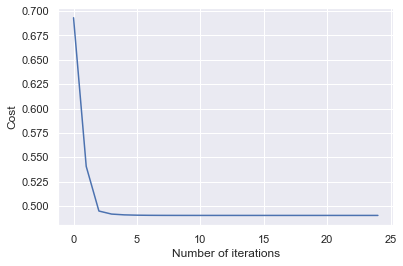

CPU times: user 1.51 s, sys: 24 ms, total: 1.54 s
Wall time: 396 ms


In [63]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=6.5)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0.0000000001
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',6.5);
plotlog6501 = losses
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [64]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain6 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 6.5 and Threshold 0.0000000001:', acctrain6,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest6 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 6.5 and Threshold 0.0000000001:', acctest6,'\n')

Trial Data: Accuracy for Alpha 6.5 and Threshold 0.0000000001: 0.799812030075188 

Test Data: Accuracy for Alpha 6.5 and Threshold 0.0000000001: 0.800075519925642 



In [65]:
print("Confusion Matrix:")
print(confusion_matrix(y1_test, ypredtest))
print("Classification Report")
print(classification_report(y1_test, ypredtest))

Confusion Matrix:
[[27451  6925]
 [ 6841 27639]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     34376
           1       0.80      0.80      0.80     34480

    accuracy                           0.80     68856
   macro avg       0.80      0.80      0.80     68856
weighted avg       0.80      0.80      0.80     68856



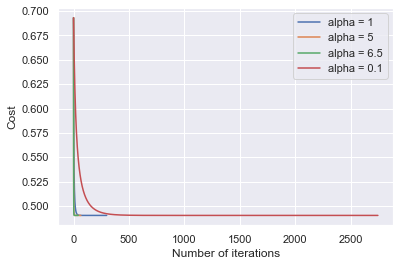

In [66]:
plt.plot(range(len(plotlog1)), plotlog1, label = 'alpha = 1')
plt.plot(range(len(plotlog5)), plotlog5, label = 'alpha = 5')
plt.plot(range(len(plotlog65)), plotlog65, label = 'alpha = 6.5')
plt.plot(range(len(plotlog01)), plotlog01, label = 'alpha = 0.1')
#plt.plot(range(len(plotlog001)), plotlog001, label = 'alpha = 0.01')
plt.legend()
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

# Experiment 3

In [67]:
varexp3 = ["MWG", "KWG", "MDIMC", "MDIMA", "KWI", "VWN", "STRN", "SA", "SB", "VWM", "avg_runtime"]
datasetexp3 = sgemm2[varexp3]

In [68]:
data_np3 = datasetexp3.values
x = data_np3[:,:-1]
y = data_np3[:,-1:]
stat.describe(y)

DescribeResult(nobs=229520, minmax=(array([23.43]), array([1170.6325])), mean=array([176.0263507]), variance=array([49921.33640155]), skewness=array([2.22402826]), kurtosis=array([4.72951634]))

In [69]:
scaler = StandardScaler()

In [70]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

Threshold: 0 

Loss Function Converges at 25 

Model Loss:  18041.108062200186 

Model Weights: 
[[-7.74003173e-07]
 [-2.01665798e-08]
 [ 2.04296767e-07]
 [ 4.79376869e-07]
 [-4.20598685e-09]
 [ 6.06790541e-09]
 [ 8.56485689e-10]
 [-6.18138491e-09]
 [-6.81515999e-09]
 [ 8.05665760e-07]]
Model Bias: 
-7.574216445328e-15
alpha: 1


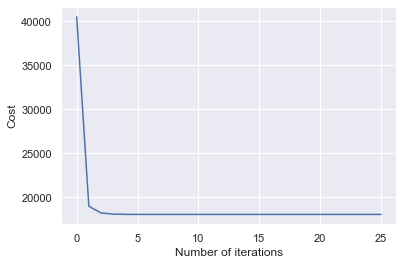

CPU times: user 960 ms, sys: 10.2 ms, total: 971 ms
Wall time: 243 ms


In [71]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',1);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [72]:
msetest1 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial1 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: MSE for Alpha 0.1:', msetest1,'\n')
print('Trial Data: MSE for Alpha 0.1:', msetrial1,'\n')
print('R-Squared:', rsquared(y1_test,regressor.forward(x1_test)), '\n')

Test Data: MSE for Alpha 0.1: 189.64956334002204 

Trial Data: MSE for Alpha 0.1: 189.9531945622404 

R-Squared: 0.2760862609420548 



Threshold: 0 

Loss Function Converges at 304 

Model Loss:  18041.10806220023 

Model Weights: 
[[-4.22331612e-06]
 [-1.06744170e-07]
 [ 1.12567371e-06]
 [ 2.61800031e-06]
 [-2.28666491e-08]
 [ 3.25136302e-08]
 [ 4.69454716e-09]
 [-3.30197614e-08]
 [-3.65192563e-08]
 [ 4.36674137e-06]]
Model Bias: 
-2.1706753309617366e-12
alpha: 0.1


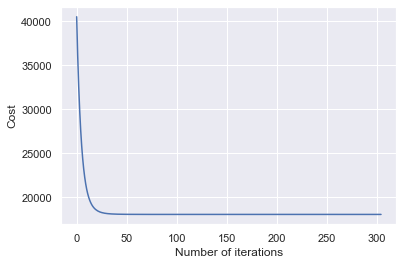

CPU times: user 2.81 s, sys: 15.7 ms, total: 2.82 s
Wall time: 706 ms


In [73]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=0.1)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',0.1);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [74]:
msetest2 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial2 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: MSE for Alpha 0.1:', msetest2,'\n')
print('Trial Data: MSE for Alpha 0.1:', msetrial2,'\n')
print('R-Squared:', rsquared(y1_test,regressor.forward(x1_test)), '\n')

Test Data: MSE for Alpha 0.1: 189.649563344546 

Trial Data: MSE for Alpha 0.1: 189.95319456224064 

R-Squared: 0.27608626090751753 



In [75]:
#Logistic Regression

In [76]:
ylogist = np.where(y > 69.79, 1, 0)

In [77]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, ylogist, test_size = 0.3, random_state = 0)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

Iteration: 0
0.6931471805599454
Threshold: 0 

Loss Function Converges at 180 

Model Loss:  0.5618043440732273 

Model Weights: 
[[-9.67727283e-09]
 [-5.67449911e-10]
 [ 5.08088811e-09]
 [ 4.33155631e-09]
 [ 9.98601114e-12]
 [-1.02185487e-09]
 [ 1.18297385e-10]
 [ 1.35252850e-09]
 [ 2.77919466e-10]
 [ 7.74585819e-09]]
alpha: 1


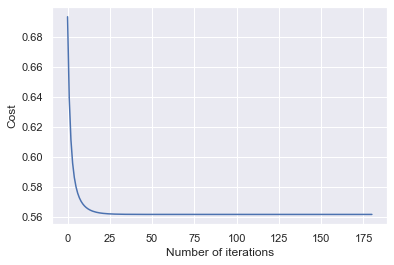

CPU times: user 5.56 s, sys: 75.4 ms, total: 5.64 s
Wall time: 1.42 s


In [78]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',1);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [79]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain7 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 1 and Threshold 0:', acctrain7,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest7 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 1 and Threshold 0:', acctest7,'\n')

Trial Data: Accuracy for Alpha 1 and Threshold 0: 0.7254145297017378 

Test Data: Accuracy for Alpha 1 and Threshold 0: 0.7250493784129197 



In [80]:
print("Confusion Matrix:")
print(confusion_matrix(y1_test, ypredtest))
print("Classification Report")
print(classification_report(y1_test, ypredtest))

Confusion Matrix:
[[25798  8578]
 [10354 24126]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     34376
           1       0.74      0.70      0.72     34480

    accuracy                           0.73     68856
   macro avg       0.73      0.73      0.72     68856
weighted avg       0.73      0.73      0.72     68856



Iteration: 0
0.6931471805599454
Threshold: 0 

Loss Function Converges at 62 

Model Loss:  0.561804344073226 

Model Weights: 
[[-2.12472638e-09]
 [-7.06785421e-10]
 [-1.80810930e-09]
 [-1.38062748e-09]
 [ 1.12103110e-11]
 [ 3.09262802e-10]
 [-1.33640174e-11]
 [-4.77133576e-10]
 [ 2.94349106e-11]
 [-6.24967346e-10]]
alpha: 6.5


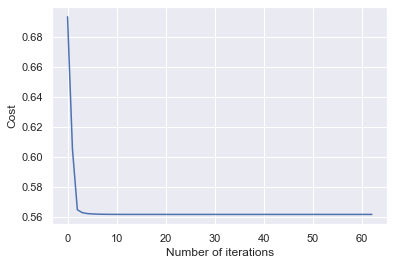

CPU times: user 2.57 s, sys: 39.1 ms, total: 2.61 s
Wall time: 661 ms


In [81]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=6.5)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',6.5);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [82]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain7 = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 6.5 and Threshold 0:', acctrain7,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest7 = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 6.5 and Threshold 0:', acctest7,'\n')

Trial Data: Accuracy for Alpha 6.5 and Threshold 0: 0.7254145297017378 

Test Data: Accuracy for Alpha 6.5 and Threshold 0: 0.7250493784129197 



In [83]:
print("Confusion Matrix:")
print(confusion_matrix(y1_test, ypredtest))
print("Classification Report")
print(classification_report(y1_test, ypredtest))

Confusion Matrix:
[[25798  8578]
 [10354 24126]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     34376
           1       0.74      0.70      0.72     34480

    accuracy                           0.73     68856
   macro avg       0.73      0.73      0.72     68856
weighted avg       0.73      0.73      0.72     68856



# EXPERIMENT 4

In [84]:
varexp4 = ["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","VWN","STRM","SA","avg_runtime"]
datasetexp4 = sgemm2[varexp4]

In [85]:
datasetexp4.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,VWN,STRM,SA,avg_runtime
count,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000,229520.000000
mean,79.503799,79.212130,25.532659,14.048100,13.960404,17.282921,17.278913,2.417005,0.495674,0.481322,176.026351
std,42.590214,42.551021,7.851829,7.884239,7.836359,9.366788,9.365922,1.942145,0.499982,0.499652,223.430831
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,1.000000,0.000000,0.000000,23.430000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,1.000000,0.000000,0.000000,41.410000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,0.000000,0.000000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,4.000000,1.000000,1.000000,216.623125
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,1.000000,1.000000,1170.632500


In [86]:
data_np4 = datasetexp4.values
x = data_np4[:,:-1]
y = data_np4[:,-1:]
stat.describe(y)

DescribeResult(nobs=229520, minmax=(array([23.43]), array([1170.6325])), mean=array([176.0263507]), variance=array([49921.33640155]), skewness=array([2.22402826]), kurtosis=array([4.72951634]))

In [87]:
scaler = StandardScaler()

In [88]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

Threshold: 0 

Loss Function Converges at 31 

Model Loss:  12785.407297261758 

Model Weights: 
[[-1.41233800e-09]
 [-1.81272873e-08]
 [-9.09566875e-09]
 [ 1.23204771e-08]
 [ 1.64172673e-08]
 [-7.33100894e-09]
 [ 5.20289675e-09]
 [ 1.82103785e-08]
 [ 2.89715341e-10]
 [-5.03847425e-10]]
Model Bias: 
-3.453118110351331e-15
alpha: 1


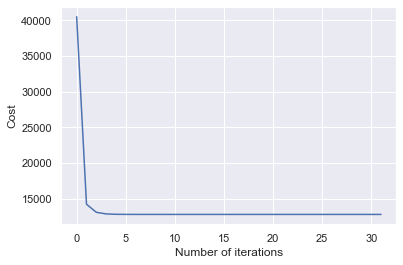

CPU times: user 1.03 s, sys: 10.6 ms, total: 1.04 s
Wall time: 269 ms


In [89]:
%%time
regressor = LinearRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('Model Bias: ');
print(regressor.dl_db)
print('alpha:',1);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [90]:
msetest1 = regressor.evaluate(x=x1_test, y=y1_test)
msetrial1 = regressor.evaluate(x=x1_train, y=y1_train)
print('Test Data: MSE for Alpha 1:', msetest1,'\n')
print('Trial Data: MSE for Alpha 1:', msetrial1,'\n')
print('R-Squared:', rsquared(y1_test,regressor.forward(x1_test)), '\n')

Test Data: MSE for Alpha 1: 159.48094646514718 

Trial Data: MSE for Alpha 1: 159.90876959855427 

R-Squared: 0.48808160715569326 



In [91]:
#Logistic Regression

In [92]:
ylogist = np.where(y > 69.79, 1, 0)

In [93]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, ylogist, test_size = 0.3, random_state = 0)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

Iteration: 0
0.6931471805599454
Threshold: 0 

Loss Function Converges at 269 

Model Loss:  0.49111362695195165 

Model Weights: 
[[-5.70396902e-09]
 [-6.01764069e-09]
 [-2.43160803e-09]
 [ 6.23934405e-09]
 [ 6.26556019e-09]
 [-8.74372894e-10]
 [ 6.00612571e-10]
 [ 3.33107801e-09]
 [ 1.51265947e-09]
 [ 1.80231943e-09]]
alpha: 1


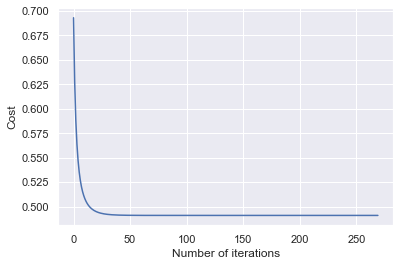

CPU times: user 8.22 s, sys: 115 ms, total: 8.33 s
Wall time: 2.1 s


In [94]:
%%time
regressor = LogisticRegressor(num_features=x1_train.shape[1])
#print(regressor.w)
#print(regressor.b)
losses = []
for iteration in range(10000):
    loss = regressor.train(x=x1_train,y=y1_train, step_size=1)
    losses.append(loss)
    if iteration % 1000 == 0:
        print("Iteration: {}".format(iteration))
        print(loss)
    k=0;
    if iteration > 2:
        c = abs(losses[iteration-1] - losses[iteration])
        if c <= k:
            print("Threshold:",k,'\n')
            print("Loss Function Converges at", iteration,'\n')
            print('Model Loss: ', losses[iteration], '\n')
            break

print('Model Weights: ');
print(regressor.dl_dw);
print('alpha:',1);
plt.plot(range(len(losses)), losses)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

In [95]:
z = np.dot(x1_train, regressor.w)
ypredtrain = 1/(1+np.exp(-z))
ypredtrain = np.where(ypredtrain > 0.5, 1, 0)
acctrain = accuracy_score(ypredtrain,y1_train)
print('Trial Data: Accuracy for Alpha 1 and Threshold 0:', acctrain,'\n')

z = np.dot(x1_test, regressor.w)
ypredtest = 1/(1+np.exp(-z))
ypredtest = np.where(ypredtest > 0.5, 1, 0)
acctest = accuracy_score(ypredtest,y1_test)
print('Test Data: Accuracy for Alpha 1 and Threshold 0:', acctest,'\n')

Trial Data: Accuracy for Alpha 1 and Threshold 0: 0.8003971020265896 

Test Data: Accuracy for Alpha 1 and Threshold 0: 0.8012518879981411 



In [96]:
print("Confusion Matrix:")
print(confusion_matrix(y1_test, ypredtest))
print("Classification Report")
print(classification_report(y1_test, ypredtest))

Confusion Matrix:
[[27449  6927]
 [ 6758 27722]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     34376
           1       0.80      0.80      0.80     34480

    accuracy                           0.80     68856
   macro avg       0.80      0.80      0.80     68856
weighted avg       0.80      0.80      0.80     68856

